## **World Population Analysis**

## **Setting Up** <a class="anchor" id="su"></a>

In [163]:
# setting up my environment

import numpy as np 
import pandas as pd 
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from itables import init_notebook_mode
from itables import show
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import plotly.offline as py
py.init_notebook_mode(connected=True)
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()

import warnings
warnings.filterwarnings('ignore')

### **Importing Dataset** <a class="anchor" id="id"></a>

In [164]:
df = pd.read_csv('./src/data/world_population.csv')
df.head()
df.tail(3)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


### **Data Processing** <a class="anchor" id="dp"></a>

In [168]:
# renaming 'Country/Territory' to 'Country'
df.rename(columns={'Country/Territory':'Country'}, inplace = True)
df = df.drop_duplicates()
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


: 

In [154]:
# renaming year columns from "Year Population" to just "Year" 

for col in df.columns:
    if 'Population' and '0' in col:
        df = df.rename(columns={col: col.split(' ')[0]})
        
df.head(3)
df.tail(3)
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022                           0
2020                           0
2015                           0
2010                           0
2000                           0
1990                           0
1980                           0
1970                           0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [157]:
df.duplicated().sum()

0

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022                         234 non-null    int64  
 6   2020                         234 non-null    int64  
 7   2015                         234 non-null    int64  
 8   2010                         234 non-null    int64  
 9   2000                         234 non-null    int64  
 10  1990                         234 non-null    int64  
 11  1980                         234 non-null    int64  
 12  1970                         234 non-null    int64  
 13  Area (km²)          

In [159]:
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022                           234
2020                           234
2015                           234
2010                           234
2000                           234
1990                           234
1980                           234
1970                           234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

In [160]:
# converting the column names into strings

df.columns = list(map(str, df.columns))

In [161]:
years = list(map(str, (1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022)))
years

['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']

In [162]:
df.describe().T.sort_values(ascending=0, by="mean")

,count,mean,std,min,25%,50%,75%,max
2022,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (km²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07
Density (per km²),234.0,4.521270e+02,2.066122e+03,0.0261,38.417875,9.534675e+01,2.389332e+02,2.317227e+04


In [114]:
continent_df = df.groupby(by='Continent').sum()
continent_df.head(3)

,Rank,CCA3,Country,Capital,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,,,,
Africa,5253,DZAAGOBENBWABFABDICMRCPVCAFTCDCOMDJICODEGYGNQE...,AlgeriaAngolaBeninBotswanaBurkina FasoBurundiC...,AlgiersLuandaPorto-NovoGaboroneOuagadougouBuju...,1426730932,1360671810,1201102442,1055228072,818946032,638150629,481536377,365444348,30317963,7127.7158,58.2109,17.87
Asia,3878,AFGARMAZEBHRBGDBTNBRNKHMCHNGEOHKGINDIDNIRNIRQI...,AfghanistanArmeniaAzerbaijanBahrainBangladeshB...,KabulYerevanBakuManamaDhakaThimphuBandar Seri ...,4721383274,4663086535,4458250182,4220041327,3735089604,3210563577,2635334228,2144906290,32138141,51251.2068,50.4692,59.19
Europe,6225,ALBANDAUTBLRBELBIHBGRHRVCYPCZEDNKESTFROFINFRAD...,AlbaniaAndorraAustriaBelarusBelgiumBosnia and ...,TiranaAndorra la VellaViennaMinskBrusselsSaraj...,743147538,745792196,741535608,735613934,726093423,720320797,692527159,655923991,23010411,33166.2371,50.1128,9.33


In [115]:
country_df = df.groupby(by='Country').sum()
country_df.head(3)

,Rank,CCA3,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,,,,
Afghanistan,36,AFG,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Albania,138,ALB,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Algeria,34,DZA,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


### **Exploratory Data Analysis and Visualization** <a class="anchor" id="eda"></a>

### World Population EDA <a class="anchor" id="wpeda"></a>

In [116]:
df['2022'].sum()

7973413042

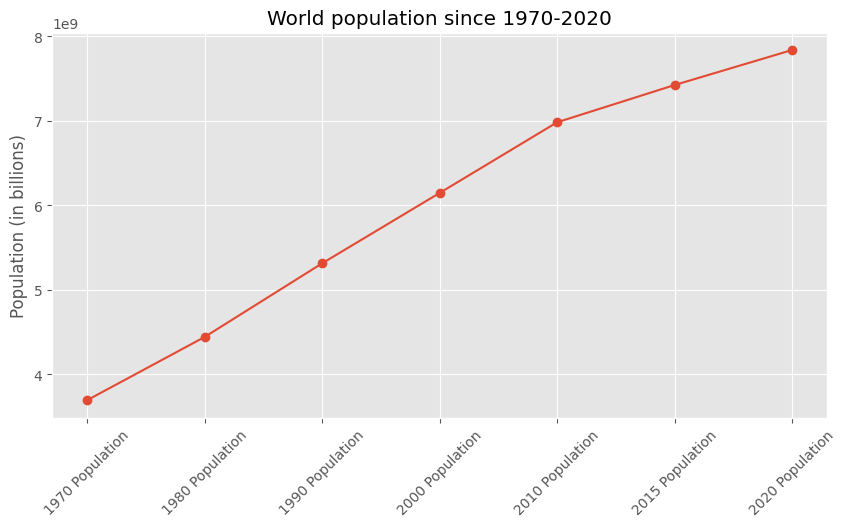

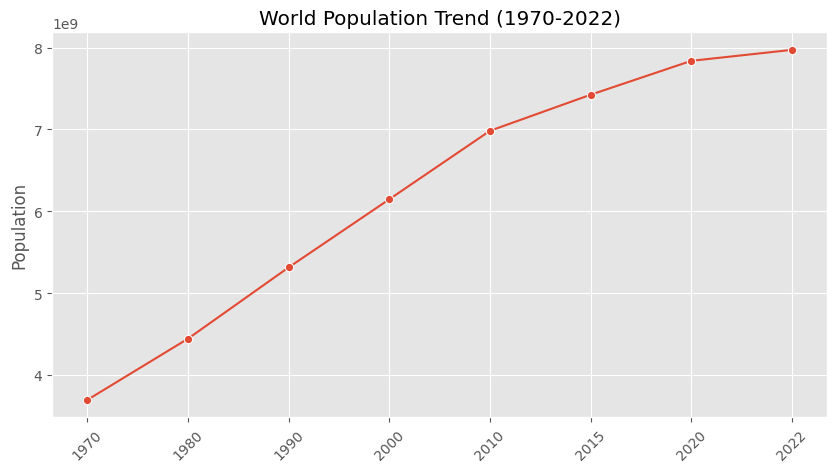

In [117]:
# plotting world population trend since 1970
plt.subplots(figsize=(10,5))
trend = df.iloc[:,5:13].sum()[::-1]
sns.lineplot(x=trend.index, y=trend.values, marker="o")
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.title("World Population Trend (1970-2022)")
plt.show()

# animated world population trend since 1970
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['figure.dpi'] = 100
plt.ioff()
fig, ax = plt.subplots(figsize=(10,5))
x = df.columns[5:13][::-1]
y = df.iloc[:,5:13].sum()[::-1]

def animate(i):
    plt.cla()
    ax.plot(x[:i], y[:i], marker="o")
    plt.xticks(rotation=45)
    plt.ylabel("Population (in billions)")
    plt.title('World population since 1970-2020')

ani = FuncAnimation(fig, animate, frames=np.arange(0, len(x)), interval=1000)
ani
# saving the animation as gif
ani.save('./src/output/world_population.gif', writer='imagemagick')

In [120]:
#  plotting current world population on map

import pycountry
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

    
# get average of a list
def Average(list):
    return sum(list) / len(list)

df_rc2022 = df.loc[:,["CCA3", "Country","2022"]]
df_rc2022["CCA3"] = [countries.get(x, 'Unknown code') for x in df_rc2022["Country"]]

fig = px.choropleth(df_rc2022, locations="CCA3",
                    hover_name="Country",
                    hover_data=df_rc2022.columns,
                    color="2022",
                    color_continuous_scale="Viridis",
                    range_color=(min(df_rc2022["2022"]), max(df_rc2022["2022"])), 
                    projection="natural earth"
                   
                   )

fig.update_layout(margin={"r":5,"t":0,"l":5,"b":0})
fig.show()

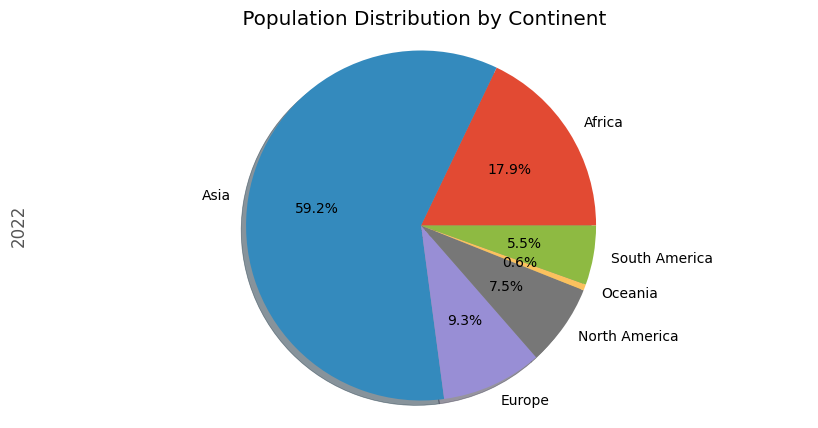

In [121]:
# let's see pie chart distribution for continent_df

continent_df['2022'].plot(kind = 'pie', figsize=(10,5), shadow=True, autopct='%1.1f%%') # autopct create %
plt.title(' Population Distribution by Continent')
plt.axis('equal')
plt.show()

In [122]:
# let's see world population by continent

fig = px.bar(data_frame= df.groupby('Continent' , as_index= False).sum().sort_values('2022', ascending=False), x= 'Continent' , y= '2022')
fig.update_layout(title= 'Current (2022) World Population per Continent', title_x= 0.5)
fig.show()

In [26]:
# let's see number of countries per continent

df_country=df['Continent'].value_counts()
fig=px.bar(x=df_country.index,
          y=df_country.values,
          color=df_country.index,
          color_discrete_sequence=px.colors.sequential.YlOrRd,
          text=df_country.values,
          title= 'Number of Countries By Continent')

fig.update_layout(xaxis_title="Countries",
                 yaxis_title="Count")

fig.show()

### Population Growth Rate <a class="anchor" id="pgr"></a>

In [27]:
# average population growth rate

df['Growth Rate'].mean()

1.0095773504273504

Since 1972 (50 years ago), the world population growth rate declined from around 2% per year to under 1.0% per year.

In [28]:
# plotting population Growth Rate on map

fig = px.choropleth(df,
                     locations='Country',
                     locationmode='country names',
                     color='Growth Rate',
                     color_continuous_scale='Viridis',
                     template='plotly',
                     title = 'Growth Rate')

fig.update_layout(font = dict(size = 17, family="Gothic"))

In [29]:
# creating dataframe for top 10 countries with highest growth rate

gwr_top10 = df.sort_values(by='Country').sort_values(by='Growth Rate', ascending=False).head(10)

gwr_top10.head(3)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
133,135,MDA,Moldova,Chisinau,Europe,3272996,3084847,3277388,3678186,4251573,4480199,4103240,3711140,33846,96.7026,1.0691,0.04
164,37,POL,Poland,Warsaw,Europe,39857145,38428366,38553146,38597353,38504431,38064255,35521429,32482943,312679,127.4698,1.0404,0.50
148,54,NER,Niger,Niamey,Africa,26207977,24333639,20128124,16647543,11622665,8370647,6173177,4669708,1267000,20.6851,1.0378,0.33


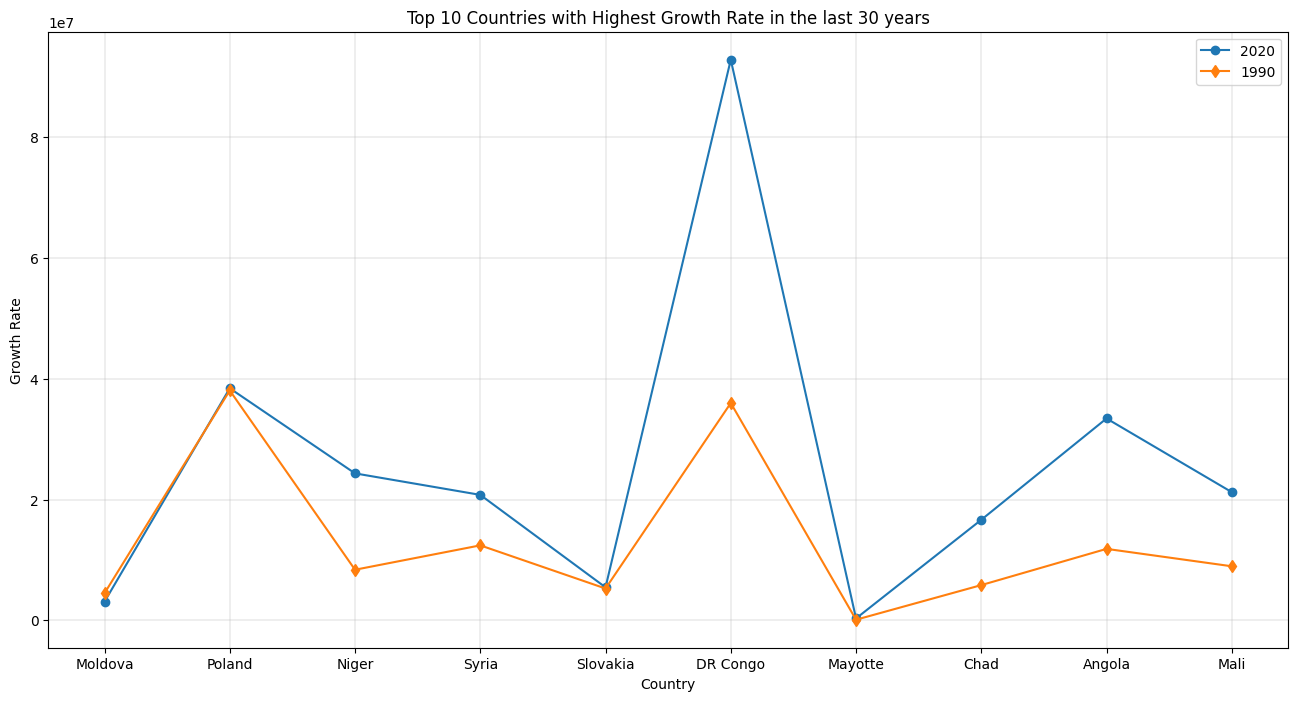

In [30]:
# plotting top 10 highest growth rate countries in the last 30 years

fig, ax = plt.subplots(figsize=(16,8))
plt.plot(gwr_top10['Country'], gwr_top10['2020'], label='2020', marker='o')
plt.plot(gwr_top10['Country'], gwr_top10['1990'], label='1990', marker='d')

plt.xlabel('Country')
plt.ylabel('Growth Rate')
plt.grid(linewidth=0.3)
plt.title('Top 10 Countries with Highest Growth Rate in the last 30 years')
plt.legend()
plt.show()

### Population Decade-By-Decade Percent Change <a class="anchor" id="pdbdpc"></a>

In [32]:
# creating dataframe for population difference decade-by-decade per continent

pop_diff = df.groupby('Continent')[['1970','1980', '1990', '2000', '2010', '2020']].sum().sort_values(by='Continent').reset_index()

pop_diff.head(3)

,Continent,1970,1980,1990,2000,2010,2020
0,Africa,365444348,481536377,638150629,818946032,1055228072,1360671810
1,Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4663086535
2,Europe,655923991,692527159,720320797,726093423,735613934,745792196


In [33]:
# finding the population decade-by-decade percent change

pop_diff['70s'] = pop_diff['1970']/pop_diff['1980']*100
pop_diff['80s'] = pop_diff['1980']/pop_diff['1990']*100
pop_diff['90s'] = pop_diff['1990']/pop_diff['2000']*100
pop_diff['00s'] = pop_diff['2000']/pop_diff['2010']*100
pop_diff['10s'] = pop_diff['2010']/pop_diff['2020']*100

pop_diff.head(3)

,Continent,1970,1980,1990,2000,2010,2020,70s,80s,90s,00s,10s
0,Africa,365444348,481536377,638150629,818946032,1055228072,1360671810,75.891327,75.458106,77.923404,77.608439,77.551990
1,Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4663086535,81.390295,82.083228,85.956802,88.508366,90.498885
2,Europe,655923991,692527159,720320797,726093423,735613934,745792196,94.714551,96.141492,99.204975,98.705773,98.635242


In [34]:
# creating dataframe for decade-by-decade

decade_diff = pop_diff.groupby('Continent')[['70s','80s', '90s', '00s', '10s']].sum().sort_values(by='Continent').reset_index()

decade_diff

,Continent,70s,80s,90s,00s,10s
0,Africa,75.891327,75.458106,77.923404,77.608439,77.551990
1,Asia,81.390295,82.083228,85.956802,88.508366,90.498885
2,Europe,94.714551,96.141492,99.204975,98.705773,98.635242
3,North America,85.647649,87.425282,86.667926,89.561653,91.330736
4,Oceania,84.991562,85.702934,85.654845,84.152162,84.452244
5,South America,79.799805,81.370326,84.987780,88.947756,91.089429


In [35]:
# let's see decade_diff statistical summary quickly

decade_diff.describe()

,70s,80s,90s,00s,10s
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,83.739198,84.696895,86.732622,87.914025,88.926421
std,6.454366,6.966887,6.898899,6.941975,7.163646
min,75.891327,75.458106,77.923404,77.608439,77.551990
25%,80.197428,81.548551,85.154546,85.241213,85.963904
50%,83.190928,83.893081,85.805823,88.728061,90.794157
75%,85.483627,86.994695,86.490145,89.408178,91.270409
max,94.714551,96.141492,99.204975,98.705773,98.635242


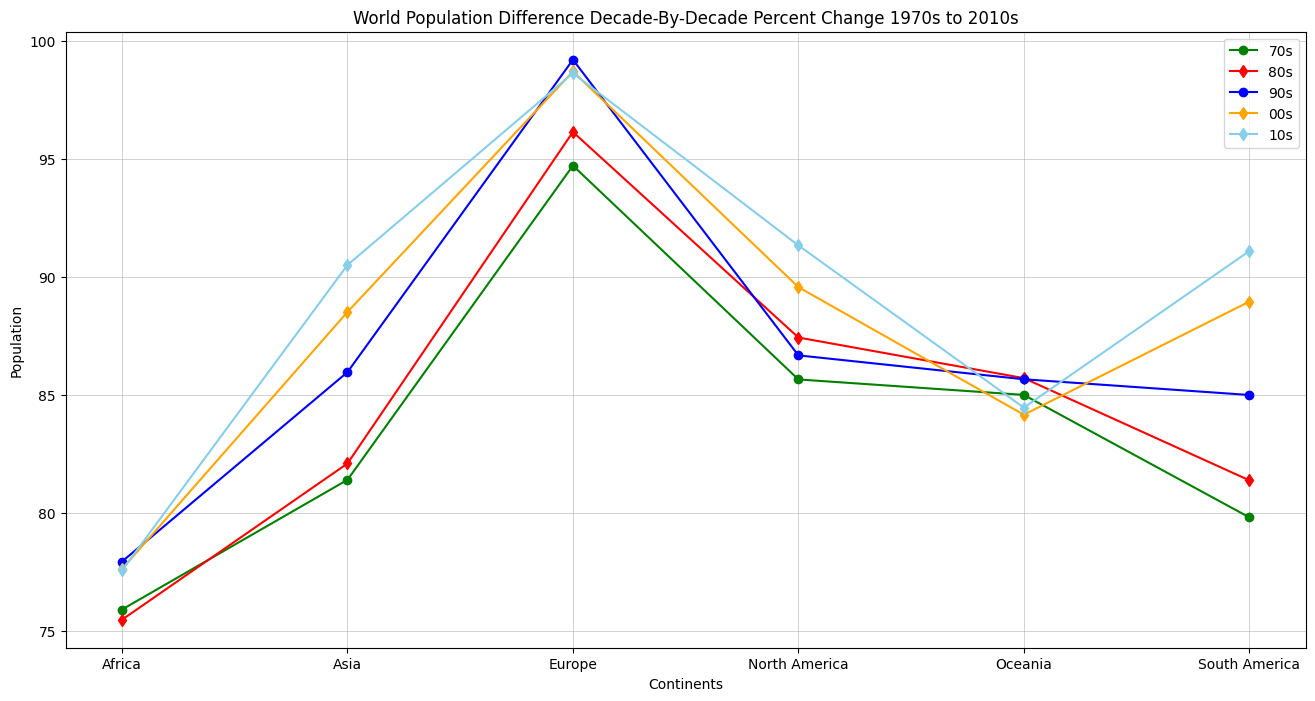

In [36]:
# plotting wolrd population difference decade-by-decade percent change 70s - 2010s

fig, ax = plt.subplots(figsize=(16,8))
plt.plot(decade_diff['Continent'], decade_diff['70s'], label='70s', marker='o', color='green')
plt.plot(decade_diff['Continent'], decade_diff['80s'], label='80s', marker='d', color='red')
plt.plot(decade_diff['Continent'], decade_diff['90s'], label='90s', marker='o', color='blue')
plt.plot(decade_diff['Continent'], decade_diff['00s'], label='00s', marker='d', color='orange')
plt.plot(decade_diff['Continent'], decade_diff['10s'], label='10s', marker='d', color='skyblue')
plt.grid(linewidth=0.4)
plt.title("World Population Difference Decade-By-Decade Percent Change 1970s to 2010s")
plt.xlabel('Continents')
plt.ylabel('Population')
plt.legend()
plt.show()

### Area <a class="anchor" id="area"></a>

In [37]:
# plotting total area distribution by continents

import plotly.graph_objects as go

df_cont= df['Continent'].unique()

tot_area_cont = []

for each in df_cont:
    df_area = df[df.Continent == each]
    area = sum(df_area["Area (km²)"])
    tot_area_cont.append(area)
    
tot_area_cont = pd.DataFrame(tot_area_cont)
df_area = pd.DataFrame(df_cont, columns = ["continent"])
df_area["total"] = tot_area_cont

fig = go.Figure(data=[go.Pie(labels=df_area.continent, values=df_area.total, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [38]:
# plotting Area distribution on map by country

fig = px.choropleth(df,
                     locations='Country',
                     locationmode='country names',
                     color='Area (km²)',
                     color_continuous_scale='Viridis',
                     template='plotly',
                     title = 'Area (km²)')

fig.update_layout(font = dict(size = 17, family="Gothic"))

### Top 10 Countries With Most Population <a class="anchor" id="t10mp"></a>

Firstly, let's copy our dataframe 'df' to 'df_copy' so we can place 'Country' as the index to avoid affecting other analysis negatively.

In [39]:
# copying dataframe 'df' to 'df_copy'

df_copy = df.copy()
df_copy.head(3)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [40]:
df_copy.set_index('Country', inplace=True)

In [41]:
df_copy.sort_values(by='2022', ascending=True, inplace=True)

df_top10 = df_copy['2022'].tail(10)
df_top10

Country
Mexico            127504125
Russia            144713314
Bangladesh        171186372
Brazil            215313498
Nigeria           218541212
Pakistan          235824862
Indonesia         275501339
United States     338289857
India            1417173173
China            1425887337
Name: 2022, dtype: int64

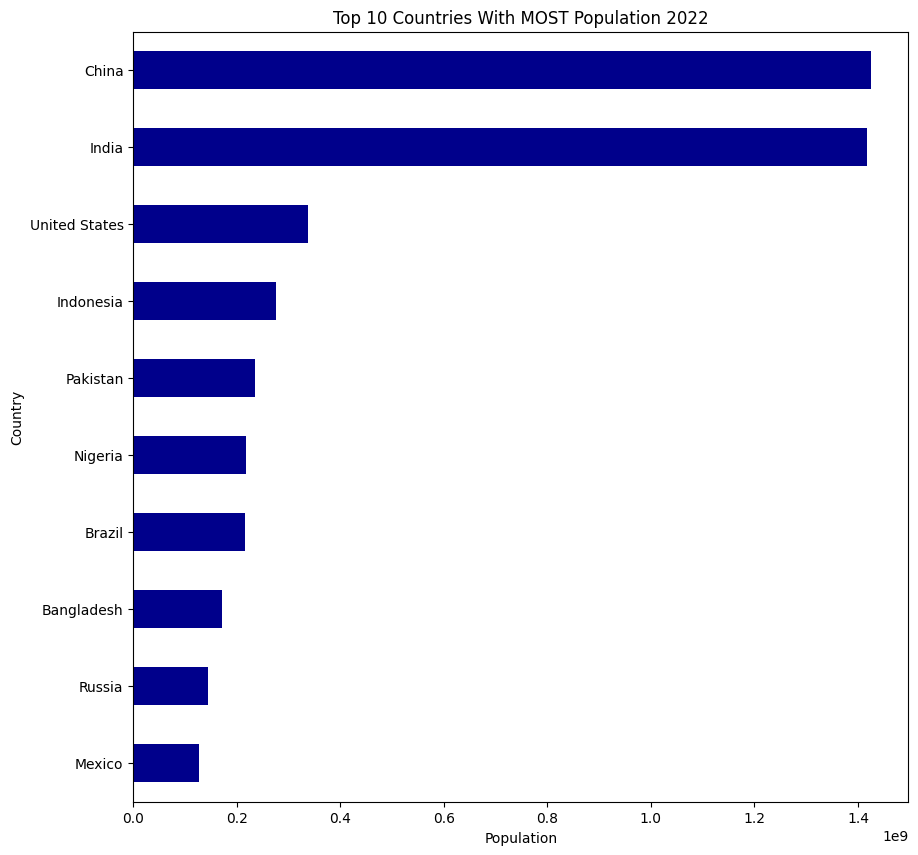

In [42]:
# plotting top 10 MOST populated countries

df_top10.plot(kind='barh', figsize=(10, 10), color='darkblue')
plt.xlabel('Population')
plt.title('Top 10 Countries With MOST Population 2022')

plt.show()

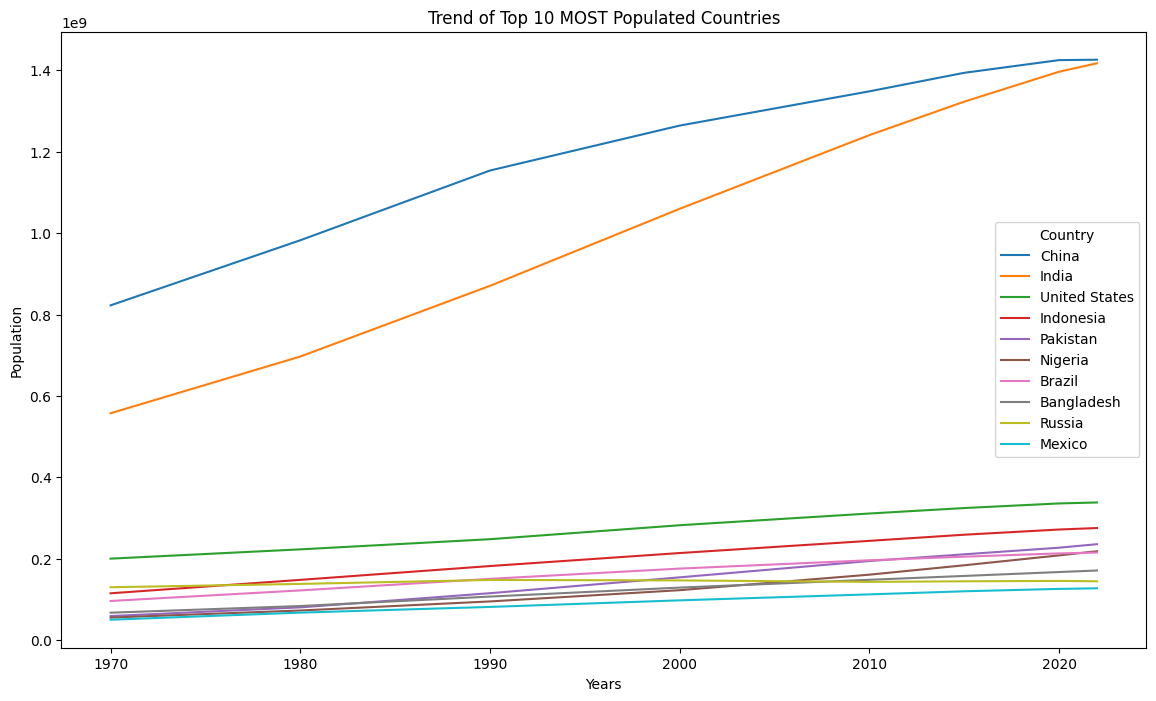

In [43]:
# plotting top 10 population trend

inplace = True 
df_copy.sort_values(by='2022', ascending=False, axis=0, inplace=True)

df_top_10 = df_copy.head(10)

df_top_10 = df_top_10[years].transpose() 

df_top_10.index = df_top_10.index.map(int)
df_top_10.plot(kind='line', figsize=(14, 8)) 

plt.title('Trend of Top 10 MOST Populated Countries')
plt.ylabel('Population')
plt.xlabel('Years')
plt.show()

### Top 10 Countries With Least Population <a class="anchor" id="t10lp"></a>

In [44]:
df_copy.sort_values(by='2022', ascending=True, inplace=True)

df_btm10 = df_copy['2022'].head(10)
df_btm10

Country
Vatican City                   510
Tokelau                       1871
Niue                          1934
Falkland Islands              3780
Montserrat                    4390
Saint Pierre and Miquelon     5862
Saint Barthelemy             10967
Tuvalu                       11312
Wallis and Futuna            11572
Nauru                        12668
Name: 2022, dtype: int64

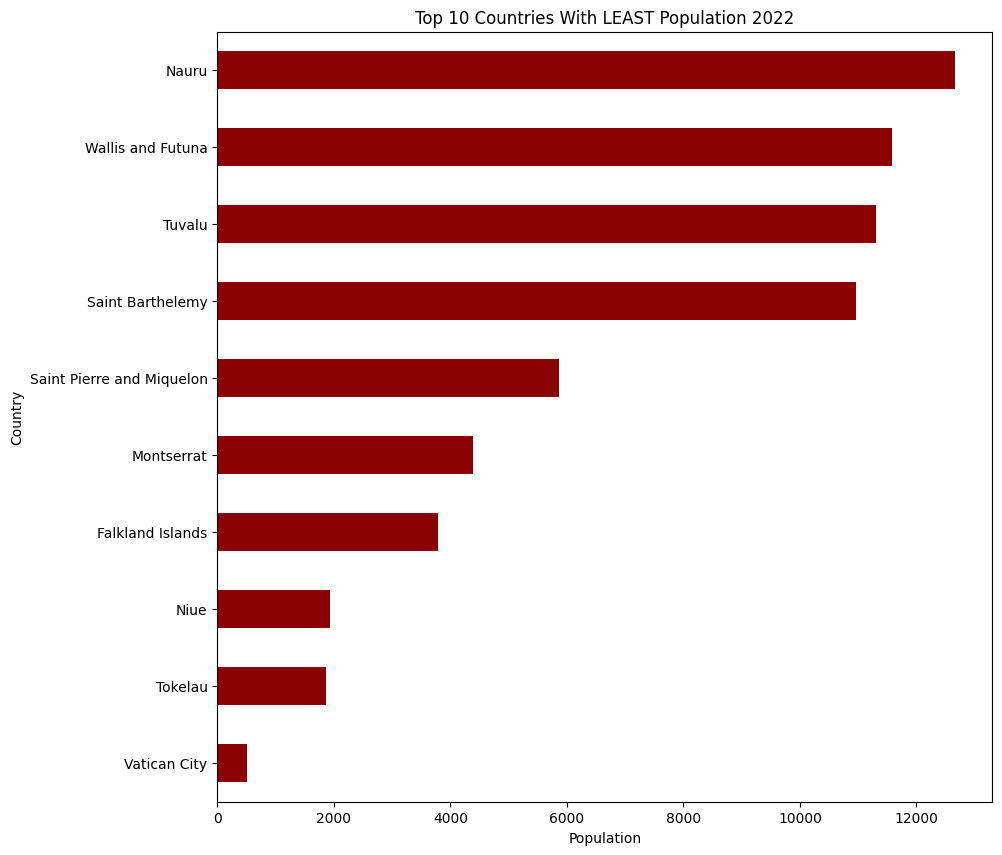

In [45]:
df_btm10.plot(kind='barh', figsize=(10, 10), color='darkred')
plt.xlabel('Population')
plt.title('Top 10 Countries With LEAST Population 2022')

plt.show()

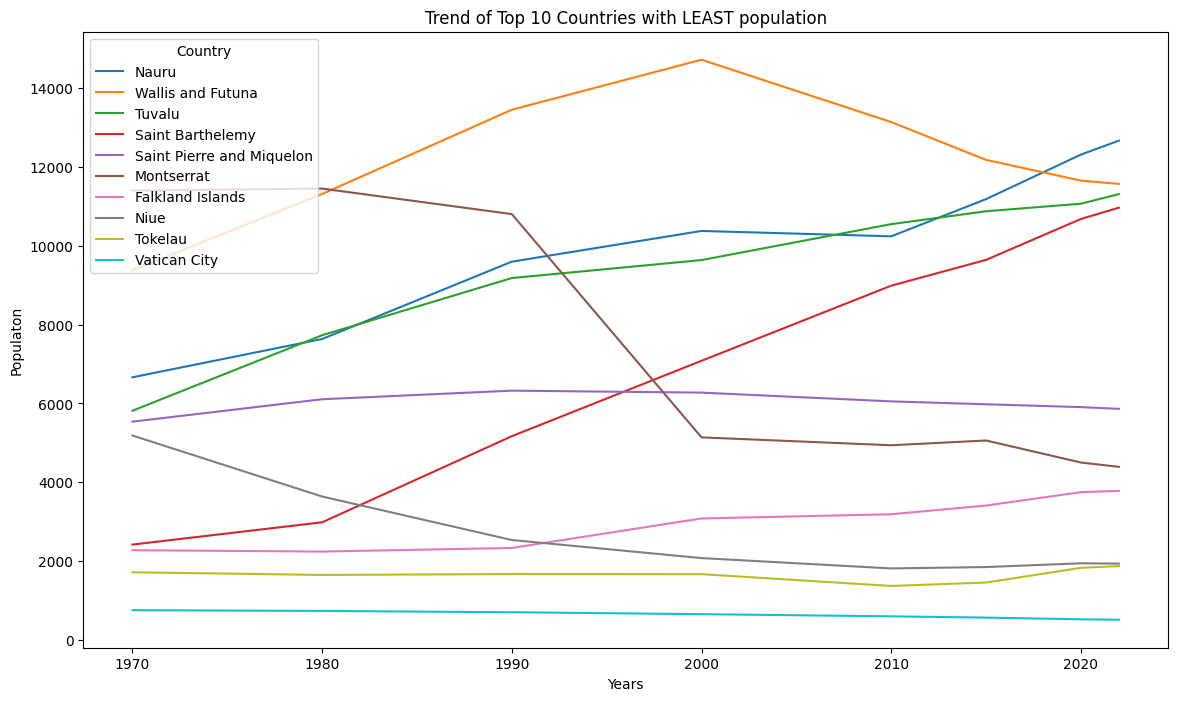

In [46]:
#  top 10 countries with least population trend.

inplace = True 
df_copy.sort_values(by='2022', ascending=False, axis=0, inplace=True)

df_bttm10 = df_copy.tail(10)

df_bttm10 = df_bttm10[years].transpose() 

df_bttm10.index = df_bttm10.index.map(int)
df_bttm10.plot(kind='line', figsize=(14, 8)) 

plt.title('Trend of Top 10 Countries with LEAST population')
plt.ylabel('Populaton')
plt.xlabel('Years')
plt.show()

### Top 5 Most Populated Countries By Continents <a class="anchor" id="t5mp"></a>

Here, we don't need to copy our dataframe or use the copied dataframe. We will use our original dataframe 'df' in this section

In [50]:
# creating dataframes for countries per continent

# Asia
asian_countries = df.loc[df["Continent"]=="Asia"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# Africa
african_countries = df.loc[df["Continent"]=="Africa"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# Europe
european_countries = df.loc[df["Continent"]=="Europe"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# North America
na_countries = df.loc[df["Continent"]=="North America"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# Oceania
oc_countries = df.loc[df["Continent"]=="Oceania"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# South America
sa_countries = df.loc[df["Continent"]=="South America"].sort_values(by=["2022"], ascending=False, ignore_index=True)


In [51]:
# plotting top 5 MOST populated countries by continent

# Asian countries
asian_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).head(5).plot.bar(x="Country", ylabel="Population", title="Asia Top 5 MOST Populated Countries", figsize=(8,6), color = 'skyblue', fontsize=12)

# African countries
african_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).head(5).plot.bar(x="Country", ylabel="Population", title="Africa Top 5 MOST Populated Countries", figsize=(8,6), color = 'darkgreen', fontsize=12)

# European countries
european_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).head(5).plot.bar(x="Country", ylabel="Population", title="Europe Top 5 MOST Populated Countries", figsize=(8,6), color = 'orange', fontsize=12)

# North American countries
na_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).head(5).plot.bar(x="Country", ylabel="Population", title="North America Top 5 MOSTG Populated Countries", figsize=(8,6), color = 'darkred', fontsize=12)

# Oceanian countries
oc_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).head(5).plot.bar(x="Country", ylabel="Population", title="Oceania Top 5 MOST Populated Countries", figsize=(8,6), color = 'purple', fontsize=12)

# South American countries
sa_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).head(5).plot.bar(x="Country", ylabel="Population", title="South America Top 5 MOST Populated Countries", figsize=(8,6), color = 'black', fontsize=12)


<Axes: title={'center': 'South America Top 5 MOST Populated Countries'}, xlabel='Country', ylabel='Population'>

### Top 5 Least Populated Countries By Continents <a class="anchor" id="t5lp"></a>

In [52]:
# plotting top 5 LEAST populated countries by continent

# Asian countries
asian_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="Asia Top 5 LEAST Populated Countries", figsize=(8,6), color = 'skyblue', fontsize=12)

# African countries
african_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="Africa Top 5 LEAST Populated Countries", figsize=(8,6), color = 'darkgreen', fontsize=12)

# European countries
european_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="Europe Top 5 LEAST Populated Countries", figsize=(8,6), color = 'orange', fontsize=12)

# North American countries
na_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="North America Top 5 LEAST Populated Countries", figsize=(8,6), color = 'darkred', fontsize=12)

# Oceanian countries
oc_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="Oceania Top 5 LEAST Populated Countries", figsize=(8,6), color = 'purple', fontsize=12)

# South American countries
sa_countries[["Country", "2022"]].sort_values(by="2022", ascending=False).tail(5).plot.bar(x="Country", ylabel="Population", title="South America Top 5 LEAST Populated Countries", figsize=(8,6), color = 'black', fontsize=12)


<Axes: title={'center': 'South America Top 5 LEAST Populated Countries'}, xlabel='Country', ylabel='Population'>

### Population Projection <a class="anchor" id="pp"></a>

### World 2030 Population Projection <a class="anchor" id="w230pp"></a>

In [53]:
# current world population

df['2022'].sum()

7973413042

World current population: 7.9 billion

In [55]:
# relationship betewen years and total population, we will convert years to int type.

df_tot = pd.DataFrame(df[years].sum(axis=0)) # use the sum() method to get the total population per year

df_tot.index = map(int, df_tot.index) # change the years to type int (useful for regression later on)

df_tot.reset_index(inplace = True) # reset the index to put in back in as a column in the df_tot dataframe

df_tot.columns = ['year', 'total'] # rename columns

df_tot.head()

,year,total
0,1970,3694136661
1,1980,4442400371
2,1990,5314191665
3,2000,6147055703
4,2010,6983784998


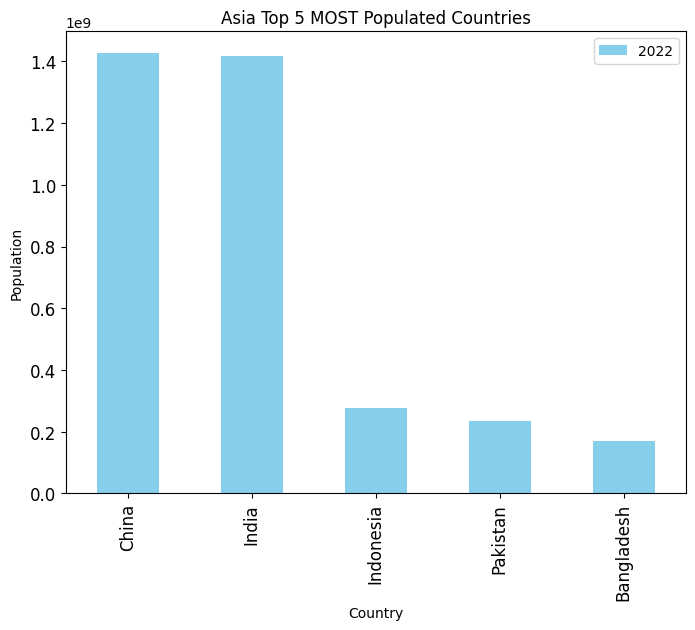

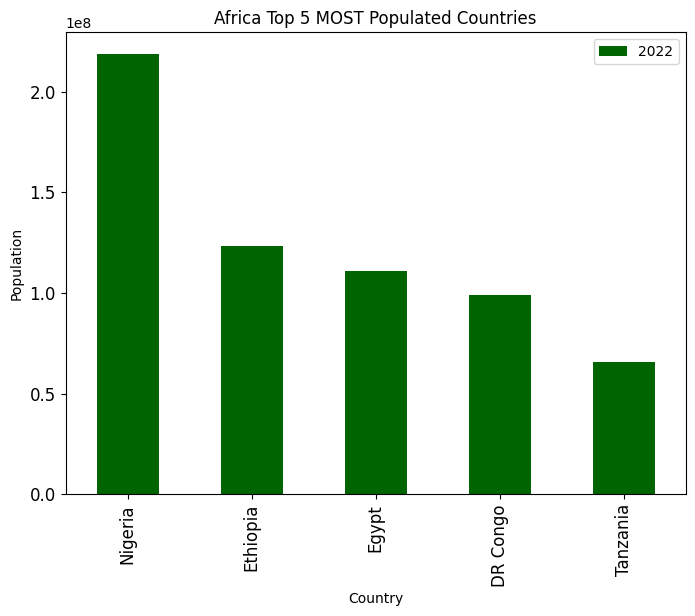

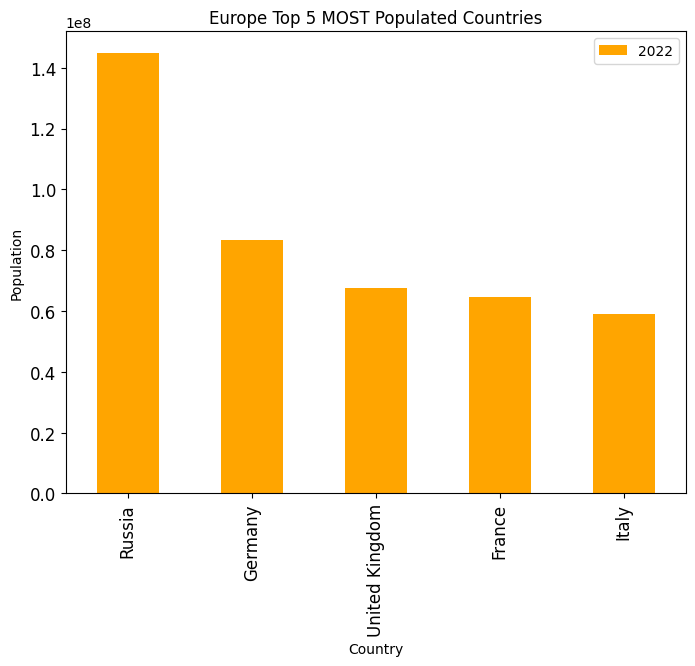

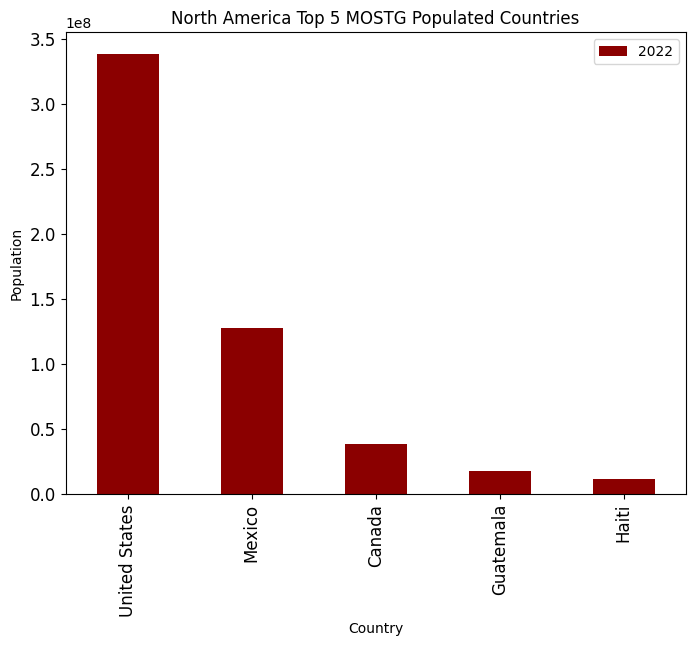

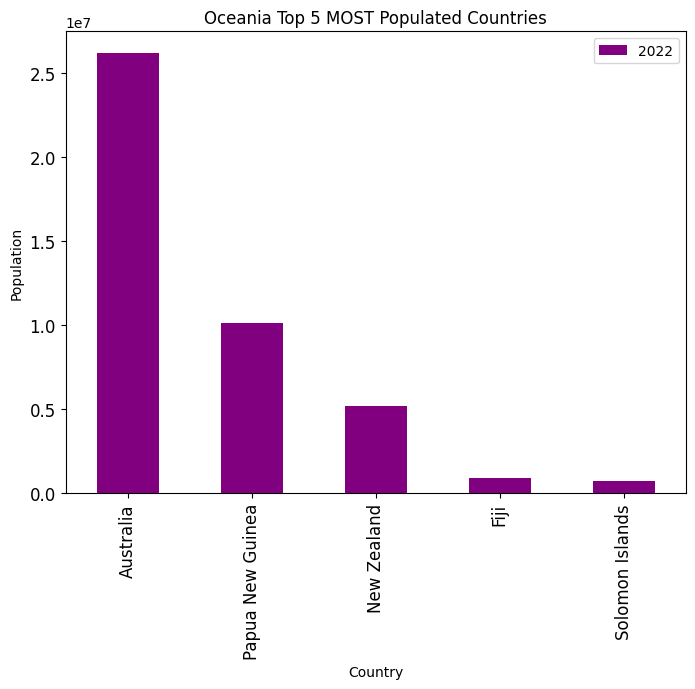

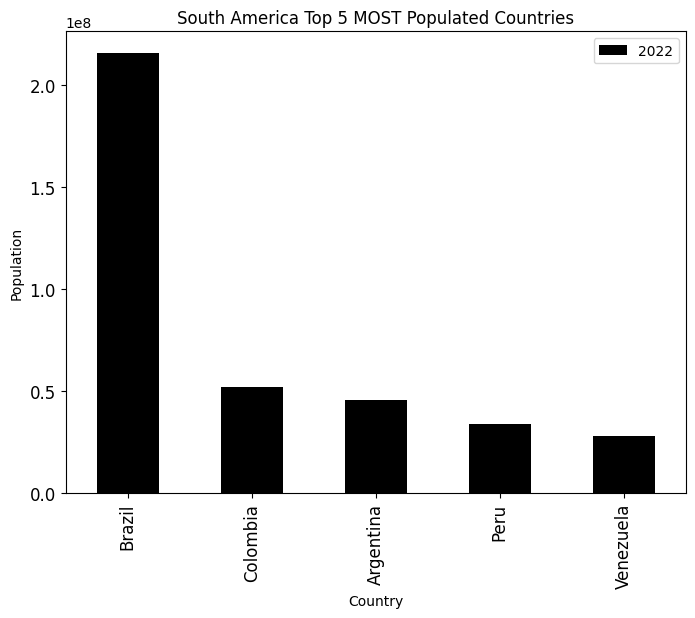

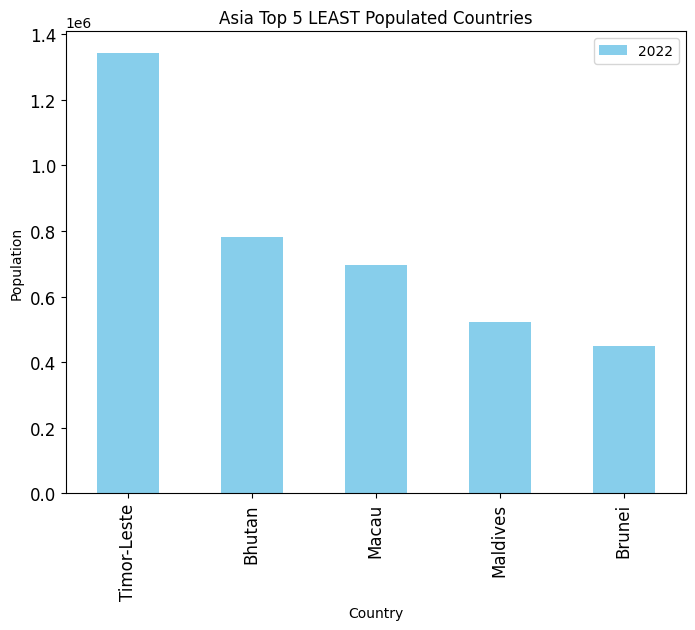

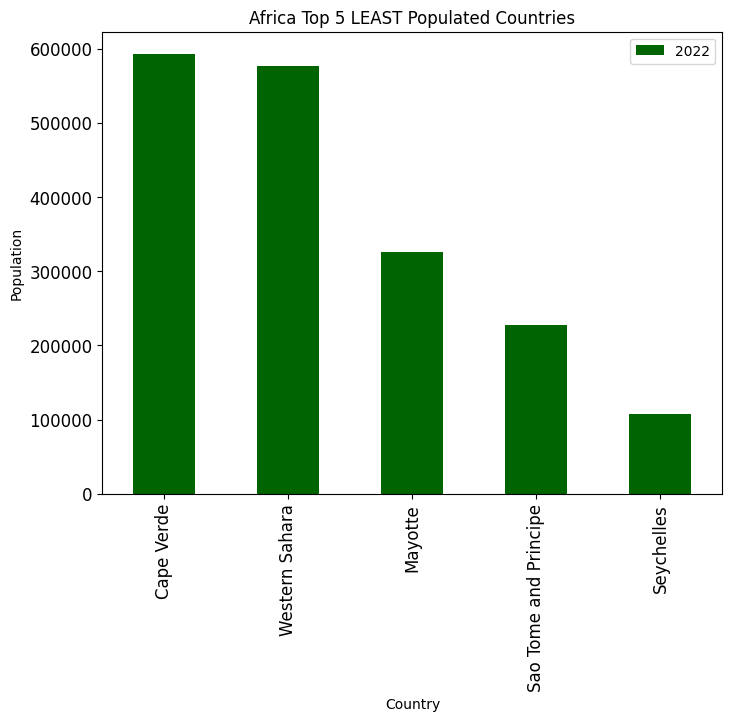

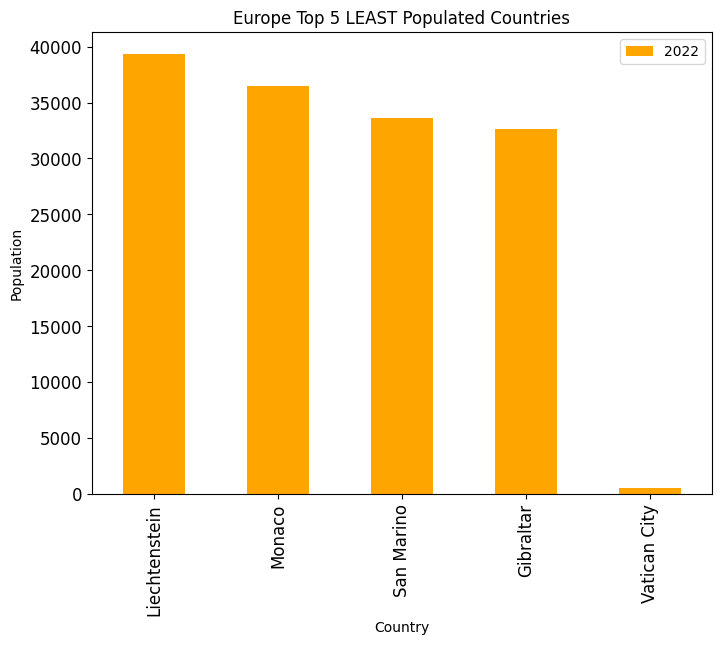

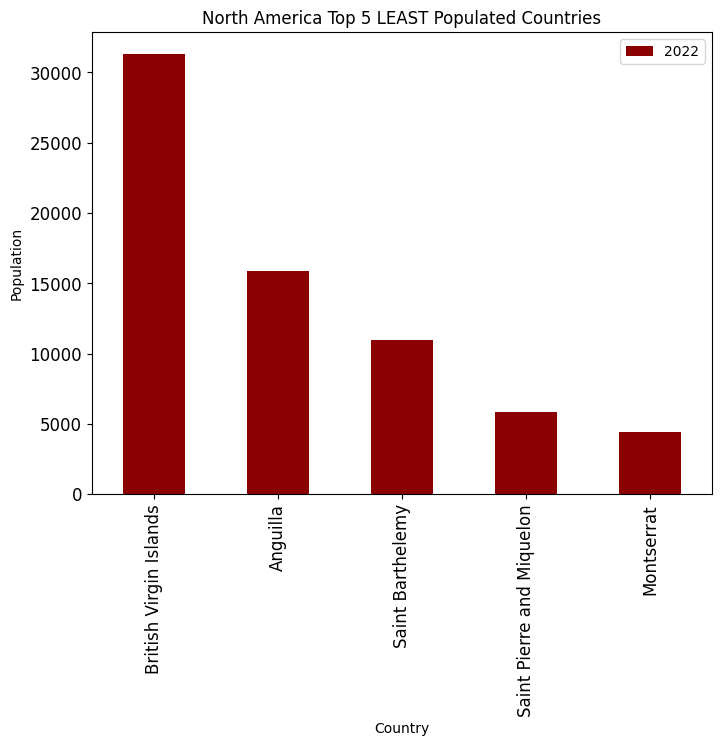

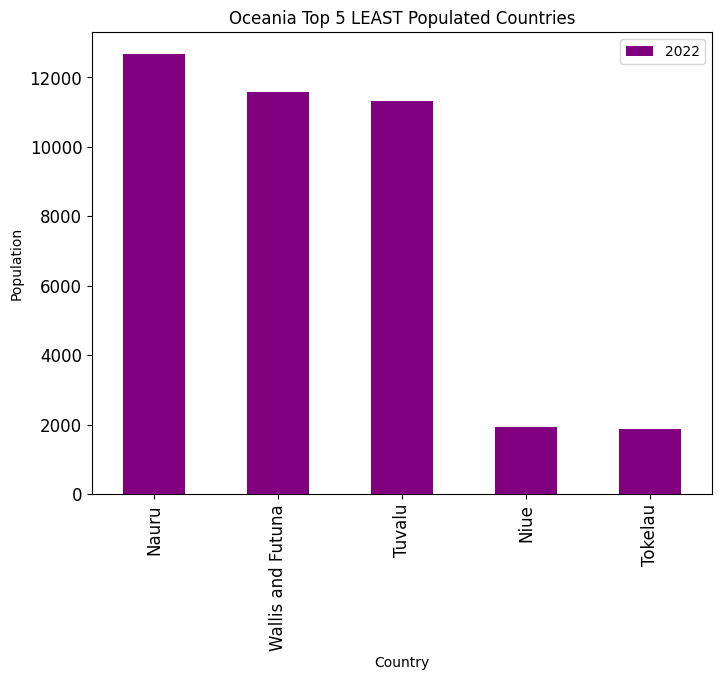

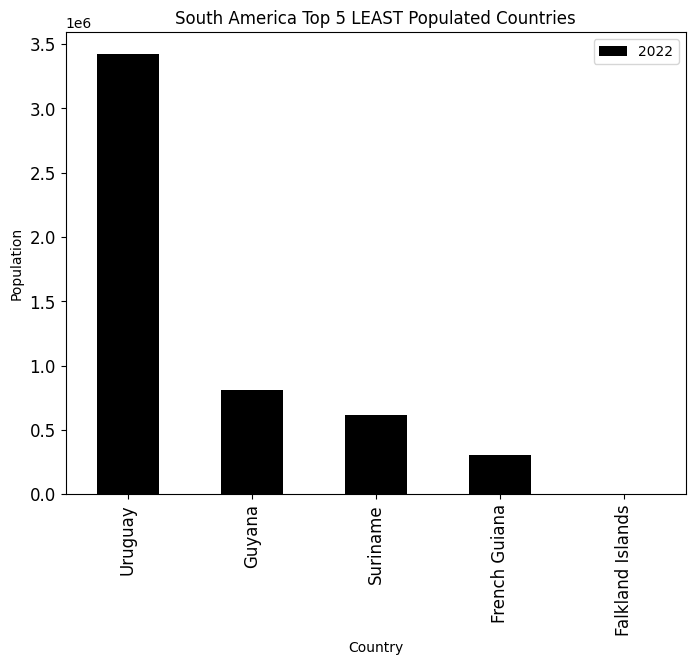

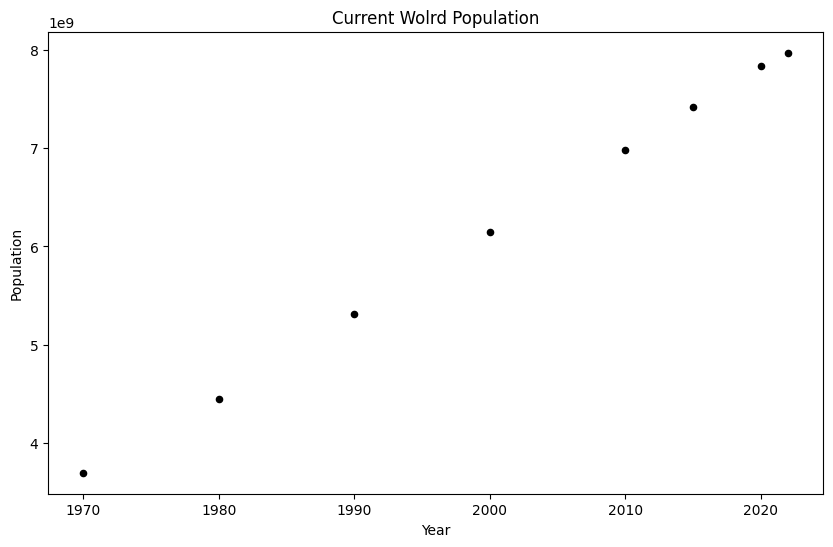

In [56]:
# plotting a scatter plot for year vs total population

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('Current Wolrd Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [126]:
# fitting our data

x = df_tot['year']      
y = df_tot['total']    
fit = np.polyfit(x, y, deg=1)

fit

array([ 8.33710451e+07, -1.60587660e+11])

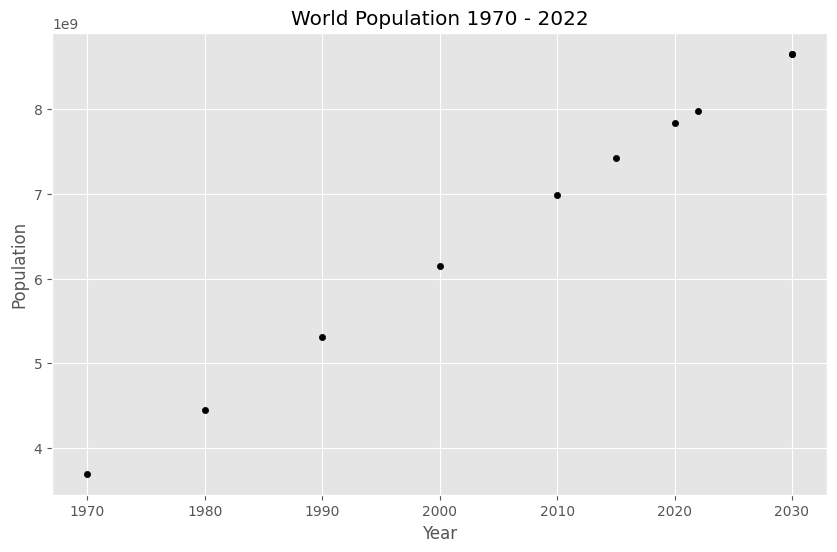

The world population in 2030 will be 8655562039


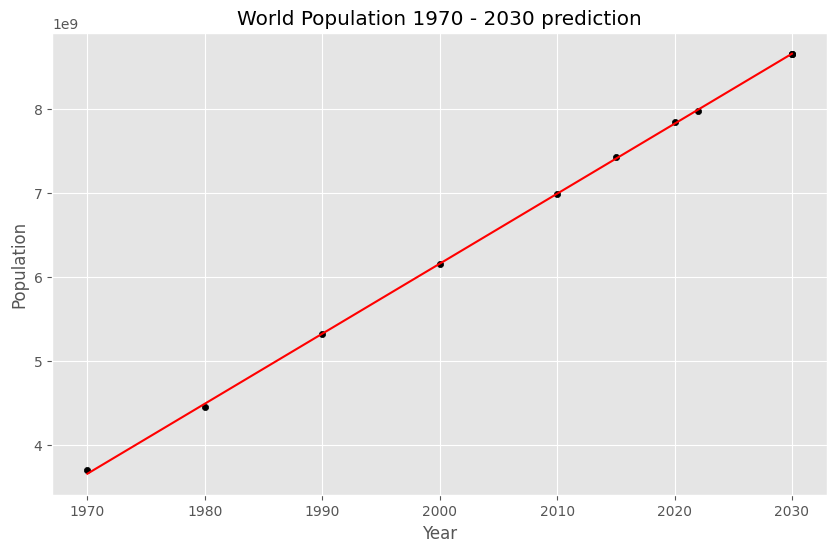

In [141]:
# plotting the regression line on the scatter plot

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('World Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'World Population = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 


# predicting the world population in 2030
from sklearn.linear_model import LinearRegression

# create linear regression object
lm = LinearRegression()
lm

# fit the data
lm.fit(df_tot[['year']], df_tot[['total']])

# predicting the world population in 2030
x = 2030
y = lm.predict([[x]])
print('The world population in 2030 will be {0:.0f}'.format(y[0][0]))

# Plotting the data and the regression line
new_df = pd.DataFrame({'year': [x], 'total': [y]})
new_df

df_tot = pd.concat([df_tot, new_df], ignore_index=True)
df_tot


# plotting the data and the regression line
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('World Population 1970 - 2030 prediction')
plt.xlabel('Year')
plt.ylabel('Population')

plt.plot(df_tot['year'], lm.predict(df_tot[['year']]), color='red')

plt.show()
